In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("API_19_DS2_en_csv_v2_3931355.csv") 

In [2]:
df['Indicator Name'].value_counts()

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

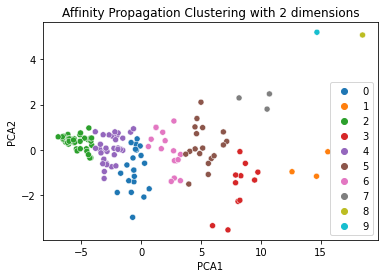

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.stats as stats

df_agri = df.loc[df['Indicator Name'] == 'Agriculture, forestry, and fishing, value added (% of GDP)']
df_agri = df_agri.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_agri = df_agri.dropna(how='any')
df_agri = df_agri.reset_index(drop=True)
df_agri = df_agri.set_index('Country Name')

def func_normalize(y):    #######  This function does a Z normalization over the data for clustering
    zscores = stats.zscore(y)
    return zscores

df_clustering = df_agri.apply(func_normalize, axis=0)
affinity_clustering = AffinityPropagation(random_state=10)
affinity = affinity_clustering.fit_predict(df_clustering)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_comp = 2

reduced_data = PCA(n_components=pca_comp).fit_transform(df_clustering)
results = pd.DataFrame(reduced_data,columns=['PCA1','PCA2'])


sns.scatterplot(x="PCA1", y="PCA2", hue=affinity, data=results,
              palette='tab10',
              legend='full',)
plt.title('Affinity Propagation Clustering with 2 dimensions')
plt.savefig('affinity.jpg')
plt.show()

In [4]:
cluster_2 = df_clustering[affinity_clustering.labels_==2] #### selecting countries from cluster number 3
cluster_0 = df_clustering[affinity_clustering.labels_==0] #### selecting countries from cluster number 1
cluster_3 = df_clustering[affinity_clustering.labels_==3] #### selecting countries from cluster number 4
cluster_5 = df_clustering[affinity_clustering.labels_==5] #### selecting countries from cluster number 6
cluster_4 = df_clustering[affinity_clustering.labels_==4] #### selecting countries from cluster number 5

cluster_2.reset_index(inplace = True)
#print(cluster_2)

cluster_0.reset_index(inplace = True)
#print(cluster_0)

cluster_3.reset_index(inplace = True)
#print(cluster_3)

cluster_5.reset_index(inplace = True)
#print(cluster_5)

cluster_4.reset_index(inplace = True)
#print(cluster_4)


C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_8016/1789771702.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singapore_df['Year'] = pd.to_numeric(singapore_df["Year"])


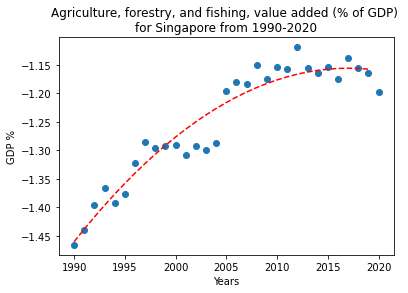

In [5]:
import seaborn as sns
from numpy import sin
from numpy import arange
from numpy import sqrt
import numpy as np

from scipy.optimize import curve_fit


cluster_2_melted = cluster_2.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_2_melted
singapore_df = cluster_2_melted[cluster_2_melted["Country Name"]=="Singapore"]
singapore_df['Year'] = pd.to_numeric(singapore_df["Year"])


# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = singapore_df["Year"]
y = singapore_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Agriculture, forestry, and fishing, value added (% of GDP) \nfor Singapore from 1990-2020")
plt.xlabel("Years")
plt.ylabel("GDP %")
plt.savefig('singa.jpg')
plt.show()


C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_8016/2413750934.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belarus_df['Year'] = pd.to_numeric(belarus_df["Year"])


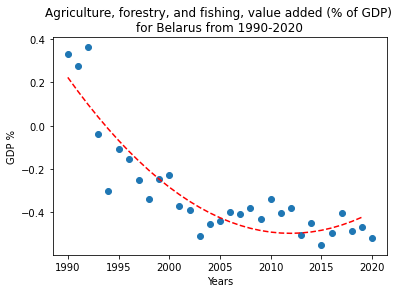

In [6]:
import seaborn as sns
from numpy import sin
from numpy import arange
from numpy import sqrt
import numpy as np

from scipy.optimize import curve_fit


cluster_0_melted = cluster_0.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_0_melted
belarus_df = cluster_0_melted[cluster_0_melted["Country Name"]=="Belarus"]
belarus_df['Year'] = pd.to_numeric(belarus_df["Year"])


# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = belarus_df["Year"]
y = belarus_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Agriculture, forestry, and fishing, value added (% of GDP) \nfor Belarus from 1990-2020")
plt.xlabel("Years")
plt.ylabel("GDP %")
plt.savefig('belarus.jpg')
plt.show()


C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_8016/2685489055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nepal_df['Year'] = pd.to_numeric(nepal_df["Year"])


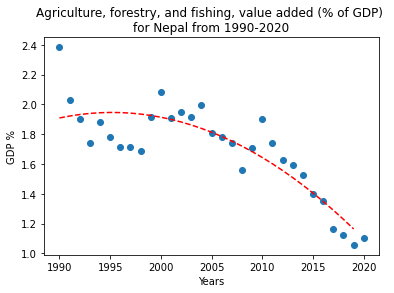

In [7]:
import seaborn as sns
from numpy import sin
from numpy import arange
from numpy import sqrt
import numpy as np

from scipy.optimize import curve_fit


cluster_3_melted = cluster_3.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_3_melted
nepal_df = cluster_3_melted[cluster_3_melted["Country Name"]=="Nepal"]
nepal_df['Year'] = pd.to_numeric(nepal_df["Year"])


# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = nepal_df["Year"]
y = nepal_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Agriculture, forestry, and fishing, value added (% of GDP) \nfor Nepal from 1990-2020")
plt.xlabel("Years")
plt.ylabel("GDP %")
plt.savefig('nepal.jpg')
plt.show()


C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_8016/3483202700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_df['Year'] = pd.to_numeric(pakistan_df["Year"])


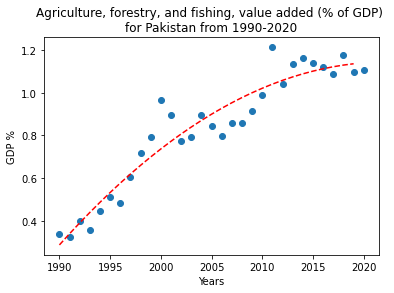

In [8]:
import seaborn as sns
from numpy import sin
from numpy import arange
from numpy import sqrt
import numpy as np

from scipy.optimize import curve_fit


cluster_5_melted = cluster_5.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_5_melted
pakistan_df = cluster_5_melted[cluster_5_melted["Country Name"]=="Pakistan"]
pakistan_df['Year'] = pd.to_numeric(pakistan_df["Year"])


# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = pakistan_df["Year"]
y = pakistan_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Agriculture, forestry, and fishing, value added (% of GDP) \nfor Pakistan from 1990-2020")
plt.xlabel("Years")
plt.ylabel("GDP %")
plt.savefig('pakistan.jpg')
plt.show()


C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_8016/252976187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominica_df['Year'] = pd.to_numeric(dominica_df["Year"])


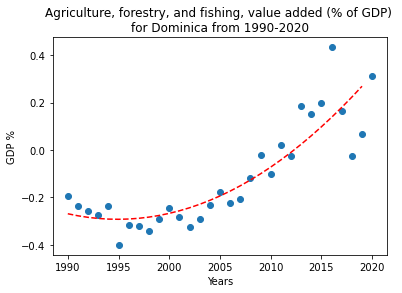

In [9]:
import seaborn as sns
from numpy import sin
from numpy import arange
from numpy import sqrt
import numpy as np

from scipy.optimize import curve_fit


cluster_4_melted = cluster_4.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_4_melted
dominica_df = cluster_4_melted[cluster_4_melted["Country Name"]=="Dominica"]
dominica_df['Year'] = pd.to_numeric(dominica_df["Year"])


# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = dominica_df["Year"]
y = dominica_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Agriculture, forestry, and fishing, value added (% of GDP) \nfor Dominica from 1990-2020")
plt.xlabel("Years")
plt.ylabel("GDP %")
plt.savefig('dominica.jpg')
plt.show()
